# Introduction to Qiskit - code
When using Qiskit a user workflow normally would be:
- *Build*: Design one or more quantum circuits that represent the problem of interest
- *Compile*: Compile circuits for a specific quantum service, on either a quantum system or a classical simulator
- *Run*: Run the compiled circuits on the specified quantum service(s). Can be either cloud-based or local
- *Analyze*: Compute summary statistics and visualize the results of the experiments

## Example - Bell basis


Total count for 00 and 11 are: {'00': 493, '11': 507}


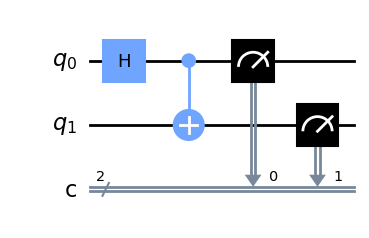

In [2]:
from qiskit import QuantumCircuit, transpile # Quantum Circuit can be understood as the instructions of the quantum system, holding all our quantum operations
from qiskit_aer import AerSimulator # Aer high performance circuit simulator
from qiskit.visualization import plot_histogram # creates histograms

"""
1. import packages
2. initialize variables
3. add gates
4. visualize the circuit
5. simulate the experiement
6. visualize the result
"""

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
# we initialized with 2 qucits in the zero state; with 2 classical bits set to zero
circuit = QuantumCircuit(2, 2)


# we want to form the bell state of quantum entanglement
# |\phi^+> = (|00> + |11>) / \sqrt{2}

#2D \frac{1}{\sqrt{2}} [v_1 + v_2, v_1 - v_2]

circuit.h(0)

# Add a CX (CNOT - controlled not) gate on control qubit 0 and target cubit 1
# putting the qubits in an entangled state
# in other words, (q_control, q_target) -> (q_control, QUBIT_XOR(q_target, q_control))
# corresponds to [e1; e2; e4; e3] assuming big endian
# but qiskit uses LITTLE ENDIAN!!!
# given n qubits and qubit j labeled as Q_j,
# qiskit orders the basis vectors as Q_{n-1} XOR ... XOR Q_1 XOR Q_0
# hence C_X with control Q_0 and target Q_1 in qiskit will correspond to [e1; e4; e3; e2]
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
# If we pass the entire quantum and classical registers to measure, the qubit i's measurement results -> classical bit i
circuit.measure((0, 1), (0, 1))

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print(f'Total count for 00 and 11 are: {counts}')

# Draw the circuit
circuit.draw('mpl')


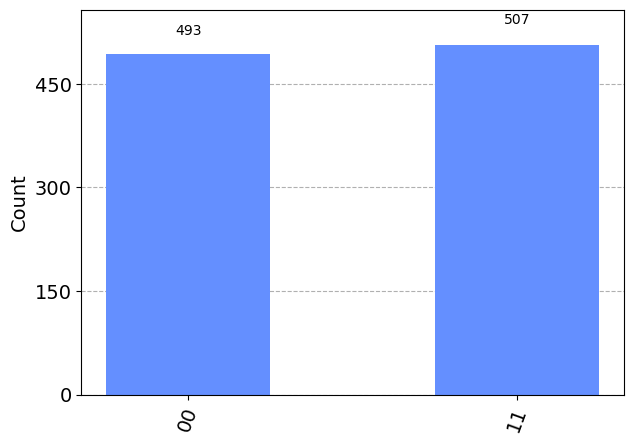

In [3]:
# Plot a histogram
plot_histogram(counts)

In [3]:
# let's generalize the above code create the rest of the bell states
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere # plot the qubits in a qsphere

simulator = AerSimulator()

def create_phi_plus():
    """
    |00> \mapsto |\phi^+> = (|00> + |11>) / \sqrt{2}
    |01> \mapsto |\psi^+> = (|01> + |10>) / \sqrt{2}
    |10> \mapsto |\phi^-> = (|00> - |11>) / \sqrt{2}
    |11> \mapsto |\psi^-> = (|01> - |10>) / \sqrt{2}
    """

    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    state = Statevector(circuit)

    circuit.measure((0, 1), (0, 1))
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(circuit)
    print(counts)
    qsphere = plot_state_qsphere(state)
    qsphere.savefig('phi_plus.png')


def create_phi_minus():
    """
    |00> \mapsto |\phi^-> = (|00> - |11>) / \sqrt{2}
    create_phi_plus().circuit = |10> \mapsto |\phi^->
    create_phi_minus().circuit = (|00> \mapsto |10>) . (|01> \mapsto \phi^->)
    (|00> \mapsto |10>) = Pauli's X-Gate on qubit 0
    """

    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.h(0)
    circuit.cx(0, 1)
    state = Statevector(circuit)

    circuit.measure((0, 1), (0, 1))
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(circuit)
    print(counts)
    qsphere = plot_state_qsphere(state)
    qsphere.savefig('phi_minus.png')


def create_psi_plus():
    """
    (|00> \mapsto |01>) . |01> \mapsto |\psi^+> = (|01> + |10>) / \sqrt{2}
    (|00> \mapsto |01>) = Pauli's X-Gate on qubit 1
    """

    circuit = QuantumCircuit(2, 2)
    circuit.x(1)
    circuit.h(0)
    circuit.cx(0, 1)
    state = Statevector(circuit)

    circuit.measure((0, 1), (0, 1))
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(circuit)
    print(counts)
    qsphere = plot_state_qsphere(state)
    qsphere.savefig('psi_plus.png')


def create_psi_minus():
    """
    (|00> \mapsto |11>) . |11> \mapsto |\psi^-> = (|01> - |10>) / \sqrt{2}
    (|00> \mapsto |11>) = Pauli's X-Gate on qubit 1
    """

    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.x(1)
    circuit.h(0)
    circuit.cx(0, 1)
    state = Statevector(circuit)

    circuit.measure((0, 1), (0, 1))
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(circuit)
    print(counts)
    qsphere = plot_state_qsphere(state)
    qsphere.savefig('psi_minus.png')


In [4]:
create_phi_plus()
create_phi_minus()


     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
{'11': 475, '00': 525}
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
{'11': 505, '00': 495}


In [5]:
create_psi_plus()
create_psi_minus()

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
{'01': 493, '10': 507}


     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     ├───┤└───┘┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─────┤ X ├─╫─┤M├
     └───┘     └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
{'01': 491, '10': 509}


In [6]:
"""
Alternatively, if we use statevector,
we can manipulate the input state without having to resort to adding extra quantum logic gates
https://fullstackquantumcomputation.tech/blog/post-tutorial-1-Bell-state/
"""
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere # plot the qubits in a qsphere

simulator = AerSimulator()
bits = {'0', '1'}
computational_basis = ('00', '01', '10', '11')

def create_bell_state(qubit_label):
    if not isinstance(qubit_label, str) or len(qubit_label) != 2 or any(qubit not in bits for qubit in qubit_label):
        raise ValueError(f'qubit label is of invalid format: {qubit_label}')

    input_state_vector = Statevector.from_label(qubit_label)
    bell_state_circuit = QuantumCircuit(2,2)
    bell_state_circuit.h(0)
    bell_state_circuit.cx(0,1)

    print(bell_state_circuit)
    output_state_vector = input_state_vector.evolve(bell_state_circuit)
    print(output_state_vector)
    qsphere = plot_state_qsphere(output_state_vector.data)
    qsphere.savefig(f'{qubit_label}.png')
    counts = output_state_vector.sample_counts(shots=1000)
    print(counts)

for qubit in computational_basis:
    create_bell_state(qubit)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
{'00': 497, '11': 503}
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))
{'00': 478, '11': 522}
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 495, '10': 505}
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
{'01': 521,